# This is an Example of using Xarray on the EFAS NetCDF File

First we use Xarray to Open the Dataset so we can see the contents

In [1]:
import xarray as xr

ds = xr.open_dataset('/home/ma/maca/clim.nc')

In [2]:
ds

<xarray.Dataset>
Dimensions:                       (x: 1000, y: 950)
Coordinates:
  * y                             (y) float64 5.498e+06 5.492e+06 5.488e+06 ...
  * x                             (x) float64 2.502e+06 2.508e+06 2.512e+06 ...
    time                          datetime64[ns] 1990-01-01T06:00:00
    step                          timedelta64[ns] 1 days
    surface                       int64 0
    latitude                      (y, x) float32 66.9821 67.0096 67.037 ...
    longitude                     (y, x) float32 -35.034 -34.9443 -34.8543 ...
    valid_time                    datetime64[ns] 1990-01-02T06:00:00
Data variables:
    dis24                         (y, x) float32 nan nan nan nan nan nan nan ...
    lambert_azimuthal_equal_area  int32 -2147483647
    land_binary_mask              (y, x) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
Attributes:
    GRIB_edition: 2
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    

We can see that the file contains X and Y, Latitude and Longitude, Information about the Lambert_Azimuthal_Equal_Area Projection and a variable called dis24. Discharge over the last 24 Hour Period.

To Access the values in the file we can simply type

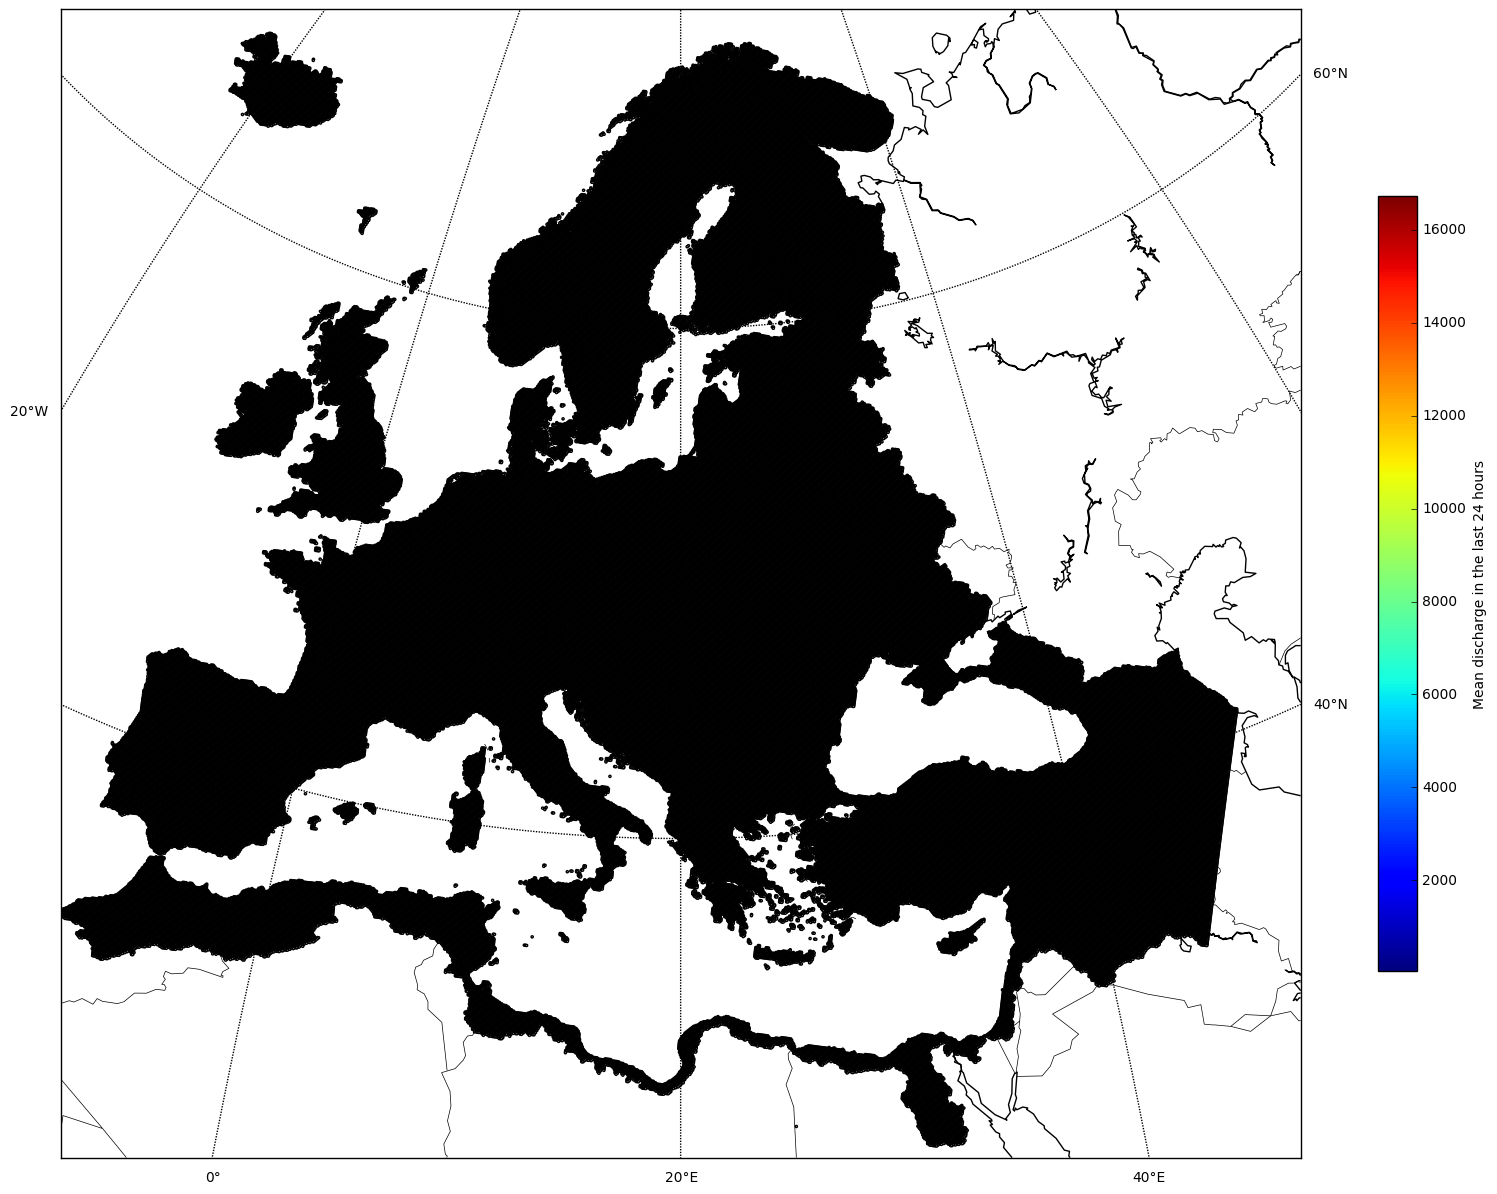

In [7]:
import matplotlib.pyplot as plot
from mpl_toolkits.basemap import Basemap,cm
import numpy as np
import pandas as pd

plot.figure(figsize=(20,20))

m = Basemap(width=5400000,height=5000000,
            resolution='l',projection='laea',\
            lat_ts=70,lat_0=50,lon_0=20.)

m.drawparallels(np.arange(-80.,81.,20.),labels=[False, True, True, False])
m.drawmeridians(np.arange(-180.,181.,20.), labels=[True,False,False,True])
m.drawcoastlines()
m.drawcountries()
cmap = plot.cm.get_cmap('jet')
cmap.set_under('white')
x,y=m(ds.longitude.values,ds.latitude.values)
sc=plot.scatter(x,y,c=ds.dis24.values,s=10,vmin=50,cmap=cmap,marker='.')
cbar = plot.colorbar(sc, shrink=.5,)
cbar.set_label(ds.dis24.GRIB_name)
plot.show()


Which lists all the Data and Metadata about this variable.

We can also look at the values it holds